In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
import cufflinks as cf


%matplotlib inline

In [2]:

import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv("amazon_baby.csv")
df.head(60)

name  ... rating
0                            Planetwise Flannel Wipes  ...      3
1                               Planetwise Wipe Pouch  ...      5
2                 Annas Dream Full Quilt with 2 Shams  ...      5
3   Stop Pacifier Sucking without tears with Thumb...  ...      5
4   Stop Pacifier Sucking without tears with Thumb...  ...      5
5   Stop Pacifier Sucking without tears with Thumb...  ...      5
6            A Tale of Baby\'s Days with Peter Rabbit  ...      4
7   Baby Tracker&reg; - Daily Childcare Journal, S...  ...      5
8   Baby Tracker&reg; - Daily Childcare Journal, S...  ...      5
9   Baby Tracker&reg; - Daily Childcare Journal, S...  ...      4
10  Baby Tracker&reg; - Daily Childcare Journal, S...  ...      4
11  Baby Tracker&reg; - Daily Childcare Journal, S...  ...      5
12  Baby Tracker&reg; - Daily Childcare Journal, S...  ...      4
13  Baby Tracker&reg; - Daily Childcare Journal, S...  ...      3
14    Nature\'s Lullabies First Year Sticker Calendar  ...      5
15    Nature\'s Lullabies First Year Sticker Calendar  ...      4
16    Nature\'s Lullabies First Year Sticker Calendar  ...      5
17   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
18   Nature\'s Lullabies Second Year Sticker Calendar  ...      4
19   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
20   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
21   Nature\'s Lullabies Second Year Sticker Calendar  ...      2
22   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
23   Nature\'s Lullabies Second Year Sticker Calendar  ...      3
24   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
25   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
26                      Baby\'s First Journal - Green  ...      5
27                        Lamaze Peekaboo, I Love You  ...      3
28                        Lamaze Peekaboo, I Love You  ...      4
29                        Lamaze Peekaboo, I Love You  ...      5
30                        Lamaze Peekaboo, I Love You  ...      5
31                        Lamaze Peekaboo, I Love You  ...      5
32                        Lamaze Peekaboo, I Love You  ...      5
33                        Lamaze Peekaboo, I Love You  ...      4
34                        Lamaze Peekaboo, I Love You  ...      3
35                        Lamaze Peekaboo, I Love You  ...      5
36                        Lamaze Peekaboo, I Love You  ...      5
37                        Lamaze Peekaboo, I Love You  ...      5
38       SoftPlay Twinkle Twinkle Elmo A Bedtime Book  ...      5
39       SoftPlay Twinkle Twinkle Elmo A Bedtime Book  ...      5
40       SoftPlay Twinkle Twinkle Elmo A Bedtime Book  ...      5
41         SoftPlay Giggle Jiggle Funbook, Happy Bear  ...      2
42  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      5
43  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      5
44  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      4
45  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      4
46  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      5
47  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      5
48           SoftPlay 4 Pack Block Book, Sweet Sesame  ...      5
49           SoftPlay 4 Pack Block Book, Sweet Sesame  ...      4
50                          SoftPlay Cloth Book, Love  ...      1
51        SoftPlay Baby\'s First Cloth Books Gift Set  ...      5
52                          SoftPlay Cloth Book, Hugs  ...      5
53  SoftPlay Baby Animals of the World Soft Cloth ...  ...      3
54  Baby\'s First Year Undated Wall Calendar with ...  ...      5
55  Baby\'s First Year Undated Wall Calendar with ...  ...      5
56  Baby\'s First Year Undated Wall Calendar with ...  ...      5
57  Baby\'s First Year Undated Wall Calendar with ...  ...      5
58                          Our Baby Girl Memory Book  ...      5
59                          Our Baby Girl Memory Book  ...      5

[60 rows x 3 columns]

# 1) No. the reviews recieved for each product

In [4]:
gk=df.groupby('name').agg({'review': lambda x:x.count()}).sort_values(by='review',ascending=False)
gk

review
name                                                      
Vulli Sophie the Giraffe Teether                       779
Simple Wishes Hands-Free Breastpump Bra, Pink, ...     560
Infant Optics DXR-5 2.4 GHz Digital Video Baby ...     558
Baby Einstein Take Along Tunes                         545
Cloud b Twilight Constellation Night Light, Turtle     517
...                                                    ...
Baloon Decorating Strip                                  0
Lamaze Play &amp; Grow, Torin the T-Rex                  0
Tommee Tippee Explora Trainer Cup- Random Color...       0
Pacifiers Cool Stage 1 Twin Pack by Born Free            0
Complete Swimava Pool &amp; Ring Set (Free Ship...       0

[32417 rows x 1 columns]

# 2)Products with more than 15 reviews

In [5]:

gk[gk['review']>15]

review
name                                                      
Vulli Sophie the Giraffe Teether                       779
Simple Wishes Hands-Free Breastpump Bra, Pink, ...     560
Infant Optics DXR-5 2.4 GHz Digital Video Baby ...     558
Baby Einstein Take Along Tunes                         545
Cloud b Twilight Constellation Night Light, Turtle     517
...                                                    ...
Evenflo Exersaucer Smartsteps Jump &amp; Go             16
Athena Daphne Convertible Crib and Changer, Cherry      16
JJ Cole Arctic Bundleme, Cocoa/Lagoon, Infant           16
Britax Chaperone Stroller, Red Mill                     16
Dream On Me Toddler Bed with Storage Drawer - C...      16

[2327 rows x 1 columns]

# 3)Replace Missing values

In [6]:
df.dropna(subset=['name', 'review'], inplace=True )
df.isnull().sum()

name      0
review    0
rating    0
dtype: int64

In [7]:
' '.join(df['review'].tolist())


# 4) Cleaning data by removing special characters, punctuations and replacing contractions and coverting lower to upper and vice-versa

In [32]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [33]:
from numpy.lib.arraysetops import setxor1d
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        x = x.replace("\'" ,"'")
        x = x.replace('?','')
        x = x.replace('!','')
        x = x.replace('*','')
        x = x.replace('_','')
        x = x.replace(';','')
        x = x.replace('[]','')
        x = x.replace('()','')
        x = x.replace('...','')
        x = x.replace('-','')
        x = x.replace('"','')
        x = x.replace(':','')
        x = x.replace(',','')
        return x
    else:
        return x

def swapped_case(x):
  if(type(x)==str):
    for key in contractions:
      value = contractions[key]
      swapped = []

      for char in value:
        if char.islower():
          swapped.append(char.upper())
        elif char.isupper():
          swapped.append(char.lower())
        else:
          swapped.append(char)
       
      value = ''.join(swapped) 
         
      x = x.replace(key, value)
    return x
  else:
    return x


In [10]:
df["review"] = df["review"].apply(lambda x:cont_to_exp(x))
df["review"] = df["review"].apply(lambda x:swapped_case(x))

In [11]:
df.head(45)

name  ... rating
0                            Planetwise Flannel Wipes  ...      3
1                               Planetwise Wipe Pouch  ...      5
2                 Annas Dream Full Quilt with 2 Shams  ...      5
3   Stop Pacifier Sucking without tears with Thumb...  ...      5
4   Stop Pacifier Sucking without tears with Thumb...  ...      5
5   Stop Pacifier Sucking without tears with Thumb...  ...      5
6            A Tale of Baby\'s Days with Peter Rabbit  ...      4
7   Baby Tracker&reg; - Daily Childcare Journal, S...  ...      5
8   Baby Tracker&reg; - Daily Childcare Journal, S...  ...      5
9   Baby Tracker&reg; - Daily Childcare Journal, S...  ...      4
10  Baby Tracker&reg; - Daily Childcare Journal, S...  ...      4
11  Baby Tracker&reg; - Daily Childcare Journal, S...  ...      5
12  Baby Tracker&reg; - Daily Childcare Journal, S...  ...      4
13  Baby Tracker&reg; - Daily Childcare Journal, S...  ...      3
14    Nature\'s Lullabies First Year Sticker Calendar  ...      5
15    Nature\'s Lullabies First Year Sticker Calendar  ...      4
16    Nature\'s Lullabies First Year Sticker Calendar  ...      5
17   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
18   Nature\'s Lullabies Second Year Sticker Calendar  ...      4
19   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
20   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
21   Nature\'s Lullabies Second Year Sticker Calendar  ...      2
22   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
23   Nature\'s Lullabies Second Year Sticker Calendar  ...      3
24   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
25   Nature\'s Lullabies Second Year Sticker Calendar  ...      5
26                      Baby\'s First Journal - Green  ...      5
27                        Lamaze Peekaboo, I Love You  ...      3
28                        Lamaze Peekaboo, I Love You  ...      4
29                        Lamaze Peekaboo, I Love You  ...      5
30                        Lamaze Peekaboo, I Love You  ...      5
31                        Lamaze Peekaboo, I Love You  ...      5
32                        Lamaze Peekaboo, I Love You  ...      5
33                        Lamaze Peekaboo, I Love You  ...      4
34                        Lamaze Peekaboo, I Love You  ...      3
35                        Lamaze Peekaboo, I Love You  ...      5
36                        Lamaze Peekaboo, I Love You  ...      5
37                        Lamaze Peekaboo, I Love You  ...      5
39       SoftPlay Twinkle Twinkle Elmo A Bedtime Book  ...      5
40       SoftPlay Twinkle Twinkle Elmo A Bedtime Book  ...      5
41         SoftPlay Giggle Jiggle Funbook, Happy Bear  ...      2
42  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      5
43  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      5
44  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      4
45  SoftPlay Peek-A-Boo Where\'s Elmo A Children\'...  ...      4

[45 rows x 3 columns]

# 5) Add polarity, length of review, word count and avg. word length

In [12]:
 def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words) 

In [13]:
from textblob import TextBlob

df['Polarity']=df['review'].apply(lambda x:TextBlob(x).sentiment.polarity)
df['len Rev']= df['review'].apply(lambda x: len(x))
df['word count']=df['review'].apply(lambda x:len(x.split()))
df['Avg word length']=df['review'].apply(lambda x:get_avg_word_len(x))


In [14]:
df

name  ... Avg word length
0                                Planetwise Flannel Wipes  ...        4.632911
1                                   Planetwise Wipe Pouch  ...        4.300000
2                     Annas Dream Full Quilt with 2 Shams  ...        5.000000
3       Stop Pacifier Sucking without tears with Thumb...  ...        4.162162
4       Stop Pacifier Sucking without tears with Thumb...  ...        4.184211
...                                                   ...  ...             ...
183526  Baby Teething Necklace for Mom Pretty Donut Sh...  ...        4.000000
183527  Baby Teething Necklace for Mom Pretty Donut Sh...  ...        4.437500
183528   Abstract 2 PK Baby / Toddler Training Cup (Pink)  ...        4.176471
183529  Baby Food Freezer Tray - Bacteria Resistant, B...  ...        4.023529
183530  Best 2 Pack Baby Car Shade for Kids - Window S...  ...        4.184211

[182384 rows x 7 columns]

# 6) Visualize the distribution of word count, review length and polarity

In [17]:
import plotly.io as pio
pio.renderers.default='colab' 
df['word count'].iplot(
     kind='hist',
     bins=100,
     xTitle='word count',
     linecolor='black',
     yTitle='count',
     title='Review Text Word Count Distribution')

In [18]:
df['len Rev'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Review Text Length Distribution')

In [19]:
df['Polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    yTitle='count',
    title='Sentiment Polarity Distribution')

# 7)Visualize polarity considering rating


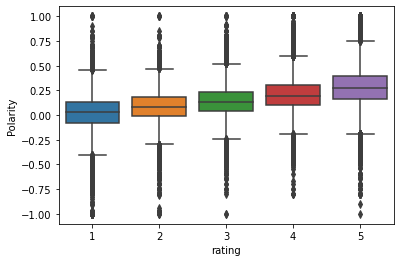

In [20]:
sns.boxplot(x=df["rating"], y=df["Polarity"], data=df)

Higher the rating, more sentimental the reviews are

# 8) Visualize the count of reviews of each rating

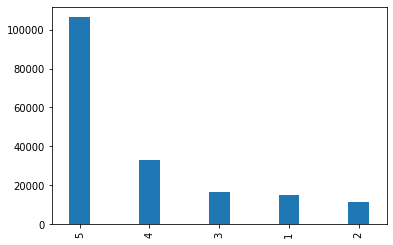

In [21]:
df["rating"].value_counts().plot.bar(width=0.3)

# 9) List the top 20 products based on polarity

In [22]:
max=df["Polarity"].max()
df.loc[df["Polarity"]==max]["name"].head(20)

1213    Thomas &amp; Friends - 3 Piece Dinnerware Set-...
2366    Prince Lionheart Table Edge Guard with 4 Corne...
3149        Sunshine Kids Mighty Tite Seat Belt Tightener
3183    Neat Solutions Sesame Street Table Topper Disp...
3200    Playtex Drop-Ins Pre-Sterilized Soft Bottle Li...
3243            Medela Breastmilk Storage and Feeding Set
3309                 Prince Lionheart Crib Rail Protector
4100                      The First Years Hands Free Gate
4131                      The First Years Hands Free Gate
4307       Philips AVENT Comfort Breast Shell Set, 2-Pack
5215    The First Years Babypro Quick Serve Bottle War...
5256    The First Years Babypro Quick Serve Bottle War...
5321    Philips AVENT BPA Free Standard Breast Pump Co...
5591         Dr. Brown\'s 3-pack 8-ounce Standard Bottles
5612    Playtex Drop-Ins Disposable Bottle Liners, 4 O...
5645                      NoJo Jungle Babies Wall Hanging
6276             Diaper Dekor Plus Diaper Disposal System
6746          

# 10) Visualize to check whether the review length changes with rating

(0.0, 700.0)

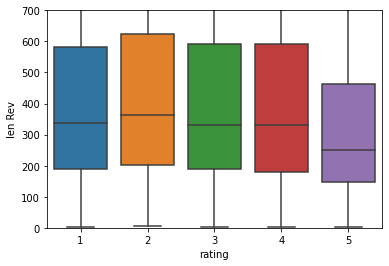

In [23]:
sns.boxplot(x=df['rating'], y=df['len Rev'], data=df)
plt.ylim(0,700)

We can see a trend that as the reviews tend to be shorter and concise as the product is rated higher.

# 11) Visualize the distribution of top 25, unigram, bigram and trigram

In [24]:
from sklearn.feature_extraction.text import CountVectorizer


In [25]:
def get_top_n_words(x, n=None):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
common_words = get_top_n_words(df['review'], 25)
common_words

[('baby', 78707),
 ('great', 58731),
 ('just', 56116),
 ('use', 52607),
 ('like', 51026),
 ('love', 43568),
 ('seat', 43348),
 ('little', 41456),
 ('easy', 40588),
 ('old', 37410),
 ('does', 36550),
 ('really', 34873),
 ('product', 33722),
 ('time', 32833),
 ('son', 32043),
 ('did', 32037),
 ('bought', 31594),
 ('good', 29300),
 ('daughter', 27235),
 ('stroller', 26062),
 ('months', 25885),
 ('used', 23680),
 ('car', 23459),
 ('loves', 22327),
 ('recommend', 20667)]

In [27]:
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])
df1

Unigram Text  Count
0          baby  78707
1         great  58731
2          just  56116
3           use  52607
4          like  51026
5          love  43568
6          seat  43348
7        little  41456
8          easy  40588
9           old  37410
10         does  36550
11       really  34873
12      product  33722
13         time  32833
14          son  32043
15          did  32037
16       bought  31594
17         good  29300
18     daughter  27235
19     stroller  26062
20       months  25885
21         used  23680
22          car  23459
23        loves  22327
24    recommend  20667

In [28]:
df1.groupby('Unigram Text').sum()['Count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 25 words in review ')

In [29]:
def get_top_n_bigram(x, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['review'], 25)
common_words

df2 = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])
df2

Bigram Text  Count
0               car seat  12279
1              month old  10845
2               year old   8941
3             months old   6777
4       highly recommend   5975
5             diaper bag   4988
6             easy clean   4859
7               easy use   4674
8            works great   3815
9          great product   3725
10           really like   2968
11             son loves   2935
12             make sure   2923
13        daughter loves   2822
14            high chair   2748
15          easy install   2711
16               old son   2519
17          good quality   2450
18     recommend product   2423
19           baby shower   2274
20      customer service   2234
21  definitely recommend   2222
22          old daughter   2115
23             old loves   2054
24           worth money   1958

In [30]:
df2.groupby('Bigram Text').sum()['Count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 bigrams in review ')

In [34]:
def get_top_n_trigram(x, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['review'], 25)
df3 = pd.DataFrame(common_words, columns = ['Trigram Text' , 'Count'])
df3


Trigram Text  Count
0              month old son   1250
1         month old daughter   1009
2             son months old    875
3           baby shower gift    809
4            month old loves    802
5   highly recommend product    765
6               year old son    703
7             love love love    689
8        daughter months old    677
9          year old daughter    656
10           infant car seat    602
11              10 month old    530
12              18 month old    516
13           baby months old    515
14            year old loves    476
15          dr brown bottles    471
16            month old baby    468
17          months old loves    408
18           just right size    407
19             old son loves    402
20            just make sure    397
21          bought month old    394
22         car seat stroller    388
23           don waste money    385
24           bought year old    384

In [35]:
df3.groupby('Trigram Text').sum()['Count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 25 trigrams in review ')